In [1]:
import numpy as np
import matplotlib.pyplot as plt

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6

In [2]:
from scipy.integrate import quad
def integrand_1(x, vphot):
    return np.sin(x)*(1-vphot*(1-np.cos(x))/(1-vphot*np.cos(x)))**2
def integral_1(x): 
    return np.sin(x)*(1-vphot*(1-np.cos(x))/(1-vphot*np.cos(x)))**2

def not_an_integral(x): 
    return ((((vphot))**(1.6)+((vphot))**(1.6)+1**1.6)/3)**(1/1.6)

vphot = 0.9
I = quad(integrand_1, 0, np.pi/2, args=(vphot))

In [3]:
vphot_list = []
beta_list = np.linspace(0.5,1.5,20)
for i in beta_list: 
    vphot = i
    vphot_list.append(not_an_integral(i))#quad(integral_1, 0, np.pi/2)[0])
    
y = 1/(1-beta_list)

<ipython-input-4-6d27049f49ba>:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot( beta_list, (1-beta_list**2)**(1/2) )


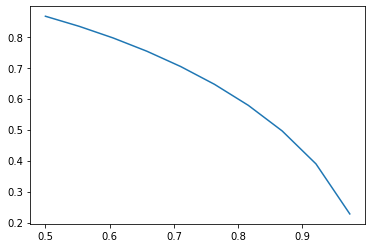

In [4]:
plt.plot( beta_list, (1-beta_list**2)**(1/2) )

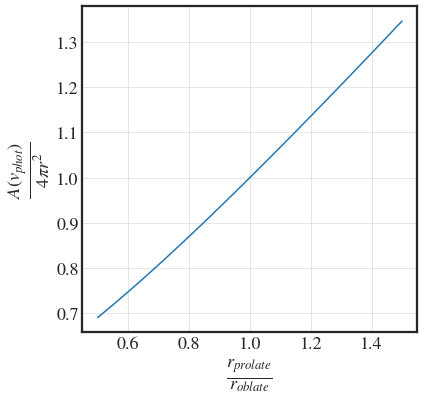

In [67]:
reset_plt(18,26)
plt.figure(figsize=(6,6))
plt.plot(beta_list, vphot_list)
plt.xlabel(r'$\frac{r_{prolate}}{r }$'), 
plt.ylabel(r'$\frac{A(v_{phot})}{4 \pi r^2}$'); 

In [46]:
vphot_list

[1.0,
 1.0107121756108512,
 1.0218086087413487,
 1.033309052403374,
 1.0452346066130784,
 1.0576078343192818,
 1.0704528894850478,
 1.083795658834112,
 1.097663918992543,
 1.112087511010976,
 1.127098534550756,
 1.1427315643666123,
 1.1590238921290221,
 1.1760157971134144,
 1.1937508498556861,
 1.2122762535524478,
 1.2316432287925136,
 1.2519074481712744,
 1.2731295284964268,
 1.2953755896852719]

(Text(0.5, 0, '$v_{phot}$'), Text(0, 0.5, '$\\frac{A(v_{phot})}{4 \\pi r^2}$'))

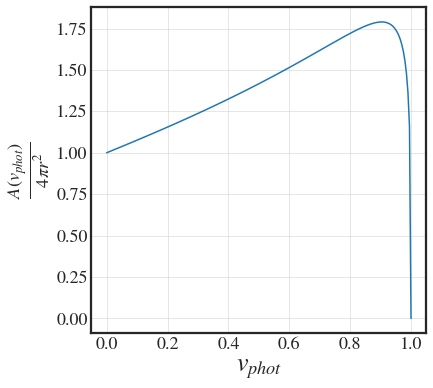

In [9]:
reset_plt(18,26)
plt.figure(figsize=(6,6))
plt.plot(beta_list, vphot_list)
plt.xlabel(r'$v_{phot}$'), plt.ylabel(r'$\frac{A(v_{phot})}{4 \pi r^2}$')

#### Relativistic Doppler Effect

In [6]:
from scipy.integrate import quad
def integrand(x):
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 
def integral(x): 
    return np.sqrt(1-vphot**2)**4 * 1/(1-vphot*np.cos(x))**4 *np.sin(x)*np.cos(x)**2 * (3) 


def integrand2(x):
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x) * 2

def integrand4(x):
    return (np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x)))**4 *np.sin(x)*np.cos(x) * 2
#def integral(x): 
#    return np.sqrt(1-vphot**2)**4 * 1/(1-vphot*np.cos(x))**4 *np.sin(x)*np.cos(x)**2 * (3) 


vphot = 0.9
#I = quad(integrand, 0, np.pi/2, args=(vphot))
#Gamma = ( (1 - vphot**2)**(-1/2) ); #dgamma = ( (1 - vphot**2)**(-3/2) )*dvphot*2*vphot
#I, Gamma * (1 - vphot) 

In [10]:
vphot_list = []
vphot_list_4 = []
beta_list = np.linspace(0.0,0.5,200)
for i in beta_list: 
    vphot = i
    vphot_list.append(quad(integrand2, 0, np.pi/2)[0])
    vphot_list_4.append(quad(integrand4, 0, np.pi/2)[0])
    
#y = (3*(beta_list-2)*beta_list-)/(2*beta_list**3)

In [11]:
#np.savetxt('doppler_with_cossin.txt', [beta_list, np.array(vphot_list)])

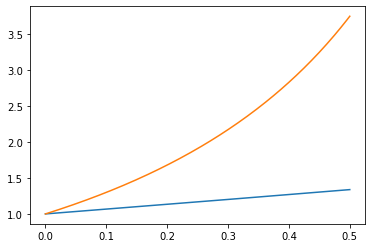

In [12]:
plt.plot(beta_list, vphot_list)
plt.plot(beta_list, vphot_list_4)

<ipython-input-13-bcebb99225b7>:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(np.linspace(0,1,200), ((1+np.linspace(0,1,200))*(1-np.linspace(0,1,200)**2)**(-1/2))**(1),


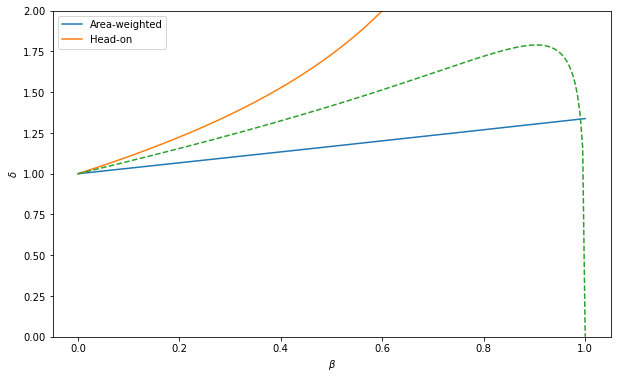

In [13]:
plt.figure(figsize=(10,6))
#plt.plot(np.linspace(0,1,200), np.array(vphot_list)**(1/4), label='Area-weighted')
plt.plot(np.linspace(0,1,200), np.array(vphot_list), label='Area-weighted')
#plt.plot(np.linspace(0,1,200), (1-2/3*11/10*np.linspace(0,1,200)), label='Area-weighted')

plt.plot(np.linspace(0,1,200), ((1+np.linspace(0,1,200))*(1-np.linspace(0,1,200)**2)**(-1/2))**(1), 
         label='Head-on' )
#plt.plot(np.linspace(0,1,200), ((1-np.linspace(0,1,200))* np.sqrt(1-np.linspace(0,1,200)**2)), label='Head-on' )

plt.xlabel(r'$\beta$'), plt.ylabel(r'$\delta$')
#plt.savefig('Pictures/area_weighted.png', dpi=300)

#plt.plot(beta_list, vphot_list_comb, label='Area-weighted prolate')
#plt.xlim(0,1), 
beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
plt.plot(beta, doppler, ls='--')

plt.ylim(0.,2), 
plt.legend(frameon=True)

#plt.plot(beta_list, (1-6/5*beta_list), label='Area-weighted')


#### Relativistic Doppler and Ellipsoid

((0.0, 2.0),)

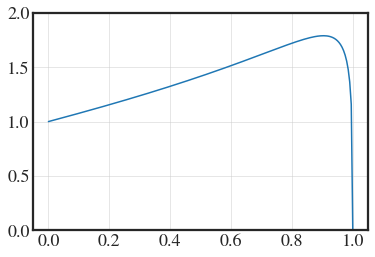

In [50]:
def integral_comb(x): 
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x)) * np.sin(x)*np.cos(x)**2 * (3) 
vphot_list_comb = []
beta_list = np.linspace(0.0,1,200)
for i in beta_list: 
    vphot = i
    vphot_list_comb.append(quad(integral_comb, 0, np.pi/2)[0])
    
plt.plot(beta_list, vphot_list_comb)
#plt.plot(beta_list, (1-6/5*beta_list), label='Area-weighted')
plt.ylim(0.,2), 

#plt.xlim(0, 0.3), plt.ylim(0.5,2)

In [43]:
np.savetxt('doppler_incl_prolate.txt', [beta_list, vphot_list_comb])